In [ ]:
!pip install vnstock

In [ ]:
from vnstock import *
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import plotly.express as px
import plotly as py
import plotly.graph_objs as go

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.layers import GRU, SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


import math
from sklearn.metrics import mean_squared_error

In [ ]:
tickers = ['FRT', 'DGW', 'MWG', 'SID', 'TMC', 'CTD', 'ROS', 'FCN', 'HBC', 'CTR',
           'HSG', 'HPG', 'NKG', 'POM', 'VIS', 'VJC', 'HVN', 'ACV', 'SGN', 'SAS',
           'DHG', 'TRA', 'PME', 'VMD', 'DVN', 'VCB', 'ACB', 'SHB', 'MSB', 'MBB',
           'FTS', 'VDS', 'MBS', 'TVB', 'TCI', 'BTP', 'POW', 'SBA', 'VSH', 'VPD',
           'PLX', 'NT2', 'PGD', 'ASP', 'PMG', 'DAH', 'DSN', 'VNG', 'NVT', 'VNS',
           'BCG', 'C47', 'LM8', 'VNE', 'VSI', 'MSN', 'SBT', 'VNM', 'AGM', 'DBC',
           'ABR', 'CTR', 'ELC', 'ICT', 'SGT', 'ADG', 'PNC', 'YEG', 'BRC', 'CSM',
           'DRC', 'SRC', 'IDI', 'VHC', 'ANV', 'CMX', 'FMC', 'STK', 'TCM', 'ADS',
           'GMC', 'KMR', 'PVT', 'PJT', 'ELC', 'TMS', 'VIP', 'BVH', 'BMI', 'BIC',
           'PGI', 'FPT', 'ELC', 'SGT', 'CMG', 'SAM']

In [ ]:
PE_list = []
PB_list = []
ROE_list = []

In [ ]:
for ticker in tickers:
    df = financial_ratio(ticker, report_range='yearly', is_all=False)
    chiso = df.loc[['priceToEarning', 'priceToBook','roe']].mean(axis=1)

    PE_list.append(chiso['priceToEarning'])
    PB_list.append(chiso['priceToBook'])
    ROE_list.append(chiso['roe'])
    print(ticker, 'thành công')

FRT thành công
DGW thành công
MWG thành công
SID thành công
TMC thành công
CTD thành công
ROS thành công
FCN thành công
HBC thành công
CTR thành công
HSG thành công
HPG thành công
NKG thành công
POM thành công
VIS thành công
VJC thành công
HVN thành công
ACV thành công
SGN thành công
SAS thành công
DHG thành công
TRA thành công
PME thành công
VMD thành công
DVN thành công
VCB thành công
ACB thành công
SHB thành công
MSB thành công
MBB thành công
FTS thành công
VDS thành công
MBS thành công
TVB thành công
TCI thành công
BTP thành công
POW thành công
SBA thành công
VSH thành công
VPD thành công
PLX thành công
NT2 thành công
PGD thành công
ASP thành công
PMG thành công
DAH thành công
DSN thành công
VNG thành công
NVT thành công
VNS thành công
BCG thành công
C47 thành công
LM8 thành công
VNE thành công
VSI thành công
MSN thành công
SBT thành công
VNM thành công
AGM thành công
DBC thành công
ABR thành công
CTR thành công
ELC thành công
ICT thành công
SGT thành công
ADG thành công
PNC thành 

In [ ]:
print("PE_list:", PE_list)
print("PB_list:", PB_list)
print("ROE_list:", ROE_list)

PE_list: [20.300000000000004, 15.5, 96.47999999999999, 43.22, 16.92, 103.72, 393.21999999999997, 9.060000000000002, 24.14, 18.06, 5.86, 12.419999999999998, 13.860000000000003, 49.68, 9.84, 414.62000000000006, 1.7799999999999998, 80.88, 19.9, 228.78000000000003, 15.520000000000001, 13.920000000000002, 11.8, 11.959999999999999, 24.800000000000004, 17.560000000000002, 7.08, 8.120000000000001, 9.325, 6.959999999999999, 14.060000000000002, 8.620000000000001, 14.780000000000001, 25.119999999999997, 15.674999999999999, 8.56, 16.62, 8.16, 16.740000000000002, 13.360000000000003, 30.240000000000002, 10.46, 11.6, 39.54, 63.220000000000006, 289.71999999999997, 10.639999999999999, 302.49999999999994, 30.6, 2.2600000000000002, 26.939999999999998, 17.02, 10.76, 65.72, 8.680000000000001, 84.18, 21.9, 17.139999999999997, 5.3999999999999995, 195.54000000000002, 17.76, 18.06, 19.34, 20.825, 46.4, 21.8, 7.0, 38.959999999999994, 7.0200000000000005, 26.580000000000002, 10.82, 16.28, 17.88, 10.4, 32.69999999

In [ ]:
print("Length of tickets:", len(tickers))
print("Length of PE_list:", len(PE_list))
print("Length of PB_list:", len(PB_list))
print("Length of ROE_list:", len(ROE_list))

Length of tickets: 96
Length of PE_list: 96
Length of PB_list: 96
Length of ROE_list: 96


In [ ]:
data = {
    'Ticker': tickers,
    'PE': PE_list,
    'PB': PB_list,
    'ROE': ROE_list
}

df_model = pd.DataFrame(data)
df_model

,Ticker,PE,PB,ROE
0,FRT,20.30,5.90,0.0875
1,DGW,15.50,3.50,0.2736
2,MWG,96.48,3.70,0.2224
3,SID,43.22,0.56,0.0222
4,TMC,16.92,0.74,0.0568
...,...,...,...,...
91,FPT,16.34,3.98,0.2572
92,ELC,19.34,1.02,0.0502
93,SGT,46.40,1.70,0.0414
94,CMG,23.38,2.32,0.1120


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

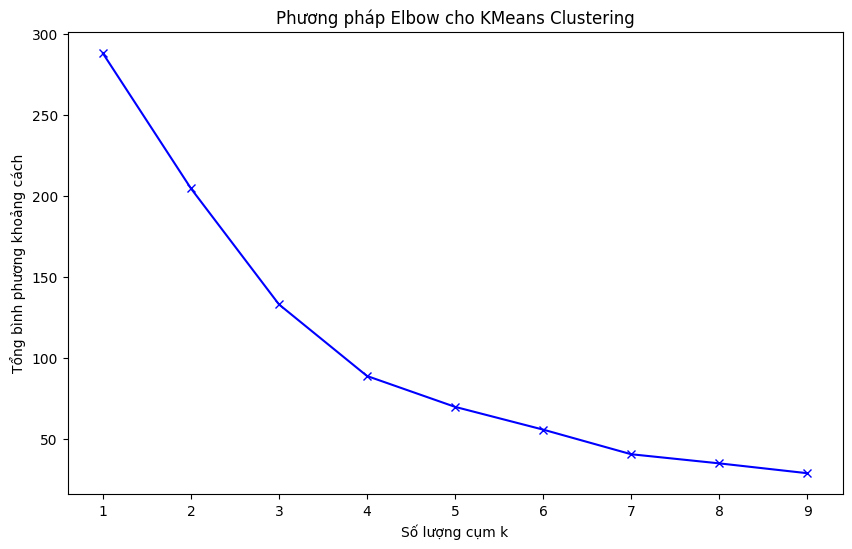

In [ ]:
# Normalize the data
scaler = StandardScaler()
df_model_scaled = scaler.fit_transform(df_model.drop('Ticker', axis=1))

# Calculate sum of squared distances
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_model_scaled)
    ssd.append(km.inertia_)

# Plot the elbow
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Số lượng cụm k')
plt.ylabel('Tổng bình phương khoảng cách')
plt.title('Phương pháp Elbow cho KMeans Clustering')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_model_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Thêm nhãn cụm vào DataFrame
df_model['Cluster'] = kmeans.labels_
df_model.head(100)


,Ticker,PE,PB,ROE,Cluster
0,FRT,20.30,5.90,0.0875,0
1,DGW,15.50,3.50,0.2736,0
2,MWG,96.48,3.70,0.2224,0
3,SID,43.22,0.56,0.0222,1
4,TMC,16.92,0.74,0.0568,1
...,...,...,...,...,...
91,FPT,16.34,3.98,0.2572,0
92,ELC,19.34,1.02,0.0502,1
93,SGT,46.40,1.70,0.0414,1
94,CMG,23.38,2.32,0.1120,3


In [ ]:
# Tạo một mảng văn bản để hiển thị thông tin cho mỗi điểm
hover_texts = ['Mã CP: ' + ticker + '\nCụm: ' + str(cluster) for ticker, cluster in zip(df_model['Ticker'], df_model['Cluster'])]

# Tạo biểu đồ 3D
trace = go.Scatter3d(
    x=df_model['PE'],
    y=df_model['PB'],
    z=df_model['ROE'],
    mode='markers',
    marker=dict(
        color=df_model['Cluster'],  # Replace 'Labels' with 'Cluster'
        size=8,
        line=dict(
            color=df_model['Cluster'],  # Replace 'Labels' with 'Cluster'
            width=12
        )
    ),
    text=hover_texts,  # Đặt mảng văn bản vừa tạo
    hoverinfo='text'  # Chỉ hiển thị văn bản khi rê chuột
)

data = [trace]

layout = go.Layout(
    title='Kmeans Clustered',
    width  = 1000,
    height = 1000,
    scene=dict(
        xaxis=dict(title='PE'),
        yaxis=dict(title='PB'),
        zaxis=dict(title='ROE')
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
df_model

,Ticker,PE,PB,ROE,Cluster
0,FRT,20.30,5.90,0.0875,0
1,DGW,15.50,3.50,0.2736,0
2,MWG,96.48,3.70,0.2224,0
3,SID,43.22,0.56,0.0222,1
4,TMC,16.92,0.74,0.0568,1
...,...,...,...,...,...
91,FPT,16.34,3.98,0.2572,0
92,ELC,19.34,1.02,0.0502,1
93,SGT,46.40,1.70,0.0414,1
94,CMG,23.38,2.32,0.1120,3


In [ ]:
df_model.to_csv('df_model.csv', index=False)

### CLUSTER 4

In [ ]:
df_HVN = stock_historical_data("HVN", "2019-01-01", "2023-12-31", "1D")
df_HVN

,time,open,high,low,close,volume,ticker
0,2019-01-02,25563,28034,25563,27571,1723444,HVN
1,2019-01-03,27648,28034,26490,26567,679554,HVN
2,2019-01-04,26567,27030,26258,26876,472287,HVN
3,2019-01-07,26798,27571,22782,27416,490463,HVN
4,2019-01-08,27262,27494,27030,27416,607856,HVN
...,...,...,...,...,...,...,...
1239,2023-12-25,11000,11750,10950,11750,532900,HVN
1240,2023-12-26,11750,12550,11750,12550,1964600,HVN
1241,2023-12-27,12550,13350,12550,12600,2488300,HVN
1242,2023-12-28,12600,12650,12200,12350,1036200,HVN


In [ ]:
# Chuẩn bị dữ liệu
data_cluster4 = df_HVN['close'].values  # Sử dụng giá đóng cửa
data_cluster4 = data_cluster4.astype('float32')
data_cluster4 = np.reshape(data_cluster4, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_cluster4 = scaler.fit_transform(data_cluster4)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size_cluster4 = int(len(dataset_cluster4) * 0.80)
test_size_cluster4 = len(dataset_cluster4) - train_size_cluster4
train_cluster4, test_cluster4 = dataset_cluster4[0:train_size_cluster4,:], dataset_cluster4[train_size_cluster4:len(dataset_cluster4),:]

In [ ]:
# Chuyển dữ liệu thành dạng thích hợp cho LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train_cluster4, Y_train_cluster4 = create_dataset(train_cluster4, look_back)
X_test_cluster4, Y_test_cluster4 = create_dataset(test_cluster4, look_back)

# Reshape input to be [samples, time steps, features]
X_train_cluster4 = np.reshape(X_train_cluster4, (X_train_cluster4.shape[0], 1, X_train_cluster4.shape[1]))
X_test_cluster4 = np.reshape(X_test_cluster4, (X_test_cluster4.shape[0], 1, X_test_cluster4.shape[1]))


In [ ]:
# Tạo mô hình LSTM
model_LSTM_cluster4 = Sequential()
model_LSTM_cluster4.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer LSTM
model_LSTM_cluster4.add(LSTM(50))  # Thêm layer LSTM thứ hai
model_LSTM_cluster4.add(Dense(1))
model_LSTM_cluster4.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
model_LSTM_cluster4.fit(X_train_cluster4, Y_train_cluster4, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200



Epoch 1/200

993/993 - 6s - loss: 0.0178 - 6s/epoch - 6ms/step
Epoch 2/200
993/993 - 2s - loss: 7.3975e-04 - 2s/epoch - 2ms/step
Epoch 3/200
993/993 - 2s - loss: 5.8934e-04 - 2s/epoch - 2ms/step
Epoch 4/200
993/993 - 3s - loss: 5.7906e-04 - 3s/epoch - 3ms/step
Epoch 5/200
993/993 - 3s - loss: 5.3955e-04 - 3s/epoch - 3ms/step
Epoch 6/200
993/993 - 3s - loss: 5.7748e-04 - 3s/epoch - 3ms/step
Epoch 7/200
993/993 - 4s - loss: 5.2854e-04 - 4s/epoch - 4ms/step
Epoch 8/200
993/993 - 5s - loss: 5.6689e-04 - 5s/epoch - 5ms/step
Epoch 9/200
993/993 - 6s - loss: 5.2073e-04 - 6s/epoch - 6ms/step
Epoch 10/200
993/993 - 6s - loss: 5.7491e-04 - 6s/epoch - 6ms/step
Epoch 11/200
993/993 - 4s - loss: 5.2740e-04 - 4s/epoch - 4ms/step
Epoch 12/200
993/993 - 4s - loss: 5.1760e-04 - 4s/epoch - 4ms/step
Epoch 13/200
993/993 - 3s - loss: 5.6234e-04 - 3s/epoch - 3ms/step
Epoch 14/200
993/993 - 4s - loss: 5.3505e-04 - 4s/epoch - 4ms/step
Epoch 15/200
993/993 - 4s - loss: 5.4528e-04 - 4s/epoch - 4ms/step
Epoch

In [ ]:
# Tạo mô hình GRU
model_gru_cluster4 = Sequential()
model_gru_cluster4.add(GRU(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer GRU
model_gru_cluster4.add(GRU(50))  # Thêm layer GRU thứ hai
model_gru_cluster4.add(Dense(1))
model_gru_cluster4.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình GRU
model_gru_cluster4.fit(X_train_cluster4, Y_train_cluster4, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
993/993 - 9s - loss: 0.0047 - 9s/epoch - 9ms/step
Epoch 2/200
993/993 - 4s - loss: 7.1990e-04 - 4s/epoch - 4ms/step
Epoch 3/200
993/993 - 3s - loss: 7.1841e-04 - 3s/epoch - 3ms/step
Epoch 4/200
993/993 - 4s - loss: 7.2144e-04 - 4s/epoch - 4ms/step
Epoch 5/200
993/993 - 3s - loss: 6.6968e-04 - 3s/epoch - 3ms/step
Epoch 6/200
993/993 - 3s - loss: 6.4943e-04 - 3s/epoch - 4ms/step
Epoch 7/200
993/993 - 4s - loss: 6.3366e-04 - 4s/epoch - 4ms/step
Epoch 8/200
993/993 - 4s - loss: 6.0885e-04 - 4s/epoch - 4ms/step
Epoch 9/200
993/993 - 4s - loss: 6.0840e-04 - 4s/epoch - 4ms/step
Epoch 10/200
993/993 - 3s - loss: 6.0465e-04 - 3s/epoch - 4ms/step
Epoch 11/200
993/993 - 3s - loss: 6.0215e-04 - 3s/epoch - 3ms/step
Epoch 12/200
993/993 - 3s - loss: 5.7312e-04 - 3s/epoch - 3ms/step
Epoch 13/200
993/993 - 3s - loss: 6.1911e-04 - 3s/epoch - 3ms/step
Epoch 14/200
993/993 - 3s - loss: 5.9884e-04 - 3s/epoch - 4ms/step
Epoch 15/200
993/993 - 3s - loss: 5.4606e-04 - 3s/epoch - 3ms/step
Epoch 16

In [ ]:
# Tạo mô hình RNN
model_rnn_cluster4 = Sequential()
model_rnn_cluster4.add(SimpleRNN(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer RNN
model_rnn_cluster4.add(SimpleRNN(50))  # Thêm layer RNN thứ hai
model_rnn_cluster4.add(Dense(1))
model_rnn_cluster4.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình RNN
model_rnn_cluster4.fit(X_train_cluster4, Y_train_cluster4, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
993/993 - 5s - loss: 0.0023 - 5s/epoch - 5ms/step
Epoch 2/200
993/993 - 2s - loss: 7.4470e-04 - 2s/epoch - 2ms/step
Epoch 3/200
993/993 - 2s - loss: 7.9681e-04 - 2s/epoch - 2ms/step
Epoch 4/200
993/993 - 2s - loss: 7.3042e-04 - 2s/epoch - 2ms/step
Epoch 5/200
993/993 - 2s - loss: 7.0411e-04 - 2s/epoch - 2ms/step
Epoch 6/200
993/993 - 2s - loss: 6.2214e-04 - 2s/epoch - 2ms/step
Epoch 7/200
993/993 - 3s - loss: 6.7321e-04 - 3s/epoch - 3ms/step
Epoch 8/200
993/993 - 2s - loss: 6.8309e-04 - 2s/epoch - 2ms/step
Epoch 9/200
993/993 - 2s - loss: 5.8023e-04 - 2s/epoch - 2ms/step
Epoch 10/200
993/993 - 2s - loss: 5.9694e-04 - 2s/epoch - 2ms/step
Epoch 11/200
993/993 - 2s - loss: 6.1541e-04 - 2s/epoch - 2ms/step
Epoch 12/200
993/993 - 2s - loss: 6.1563e-04 - 2s/epoch - 2ms/step
Epoch 13/200
993/993 - 2s - loss: 5.9154e-04 - 2s/epoch - 2ms/step
Epoch 14/200
993/993 - 2s - loss: 5.9867e-04 - 2s/epoch - 2ms/step
Epoch 15/200
993/993 - 2s - loss: 5.8747e-04 - 2s/epoch - 2ms/step
Epoch 16

In [ ]:
# Predictions
trainPredict_LTSM_cluster4 = model_LSTM_cluster4.predict(X_train_cluster4)
testPredict_LTSM_cluster4 = model_LSTM_cluster4.predict(X_test_cluster4)

# Calculate metrics
train_mae_cluster4 = mean_absolute_error(Y_train_cluster4, trainPredict_LTSM_cluster4)
train_mape_cluster4 = np.mean(np.abs((Y_train_cluster4 - trainPredict_LTSM_cluster4) / Y_train_cluster4)) * 100
train_mse_cluster4 = mean_squared_error(Y_train_cluster4, trainPredict_LTSM_cluster4)
train_rmse_cluster4 = math.sqrt(train_mse_cluster4)

test_mae_cluster4 = mean_absolute_error(Y_test_cluster4, testPredict_LTSM_cluster4)
test_mape_cluster4 = np.mean(np.abs((Y_test_cluster4 - testPredict_LTSM_cluster4) / Y_test_cluster4)) * 100
test_mse_cluster4 = mean_squared_error(Y_test_cluster4, testPredict_LTSM_cluster4)
test_rmse_cluster4 = math.sqrt(test_mse_cluster4)

# Calculate R2 score for training data
train_r2 = r2_score(Y_train_cluster4, trainPredict_LTSM_cluster4)

# Calculate R2 score for testing data
test_r2 = r2_score(Y_test_cluster4, testPredict_LTSM_cluster4)

print("------------------LSTM------------------")

print('Train MAE: %.2f' % train_mae_cluster4)
print('Train MAPE: %.2f' % train_mape_cluster4)
print('Train MSE: %.2f' % train_mse_cluster4)
print('Train RMSE: %.2f' % train_rmse_cluster4)


print('Test MAE: %.2f' % test_mae_cluster4)
print('Test MAPE: %.2f' % test_mape_cluster4)
print('Test MSE: %.2f' % test_mse_cluster4)
print('Test RMSE: %.2f' % test_rmse_cluster4)

print('Train R2: %.2f' % train_r2)
print('Test R2: %.2f' % test_r2)

8/8 [==============================] - 0s 2ms/step
------------------LSTM------------------
Train MAE: 0.01
Train MAPE: inf
Train MSE: 0.00
Train RMSE: 0.02
Test MAE: 0.01
Test MAPE: 33.59
Test MSE: 0.00
Test RMSE: 0.01
Train R2: 0.99
Test R2: 0.92


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\3335025083.py:7: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Predictions for GRU model
trainPredict_gru_cluster4 = model_gru_cluster4.predict(X_train_cluster4)
testPredict_gru_cluster4 = model_gru_cluster4.predict(X_test_cluster4)

# Calculate metrics for GRU model
train_mae_gru_cluster4 = mean_absolute_error(Y_train_cluster4, trainPredict_gru_cluster4)
train_mape_gru_cluster4 = np.mean(np.abs((Y_train_cluster4 - trainPredict_gru_cluster4) / Y_train_cluster4)) * 100
train_mse_gru_cluster4 = mean_squared_error(Y_train_cluster4, trainPredict_gru_cluster4)
train_rmse_gru_cluster4 = math.sqrt(train_mse_gru_cluster4)

test_mae_gru_cluster4 = mean_absolute_error(Y_test_cluster4, testPredict_gru_cluster4)
test_mape_gru_cluster4 = np.mean(np.abs((Y_test_cluster4 - testPredict_gru_cluster4) / Y_test_cluster4)) * 100
test_mse_gru_cluster4 = mean_squared_error(Y_test_cluster4, testPredict_gru_cluster4)
test_rmse_gru_cluster4 = math.sqrt(test_mse_gru_cluster4)

# Calculate R2 score for training data
train_r2_gru_cluster4 = r2_score(Y_train_cluster4, trainPredict_gru_cluster4)

# Calculate R2 score for testing data
test_r2_gru_cluster4 = r2_score(Y_test_cluster4, testPredict_gru_cluster4)

print("------------------GRU------------------")

print('GRU Train MAE: %.2f' % train_mae_gru_cluster4)
print('GRU Train MAPE: %.2f' % train_mape_gru_cluster4)
print('GRU Train MSE: %.2f' % train_mse_gru_cluster4)
print('GRU Train RMSE: %.2f' % train_rmse_gru_cluster4)


print('GRU Test MAE: %.2f' % test_mae_gru_cluster4)
print('GRU Test MAPE: %.2f' % test_mape_gru_cluster4)
print('GRU Test MSE: %.2f' % test_mse_gru_cluster4)
print('GRU Test RMSE: %.2f' % test_rmse_gru_cluster4)

print('GRU Train R2: %.2f' % train_r2_gru_cluster4)
print('GRU Test R2: %.2f' % test_r2_gru_cluster4)

8/8 [==============================] - 0s 2ms/step
------------------GRU------------------
GRU Train MAE: 0.01
GRU Train MAPE: inf
GRU Train MSE: 0.00
GRU Train RMSE: 0.02
GRU Test MAE: 0.01
GRU Test MAPE: 33.92
GRU Test MSE: 0.00
GRU Test RMSE: 0.01
GRU Train R2: 0.99
GRU Test R2: 0.92


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\727805606.py:7: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
print("------------------RNN------------------")
# Predictions for RNN model
trainPredict_rnn_cluster4 = model_rnn_cluster4.predict(X_train_cluster4)
testPredict_rnn_cluster4 = model_rnn_cluster4.predict(X_test_cluster4)

# Calculate metrics for RNN model
train_mae_rnn_cluster4 = mean_absolute_error(Y_train_cluster4, trainPredict_rnn_cluster4)
train_mape_rnn_cluster4 = np.mean(np.abs((Y_train_cluster4 - trainPredict_rnn_cluster4) / Y_train_cluster4)) * 100
train_mse_rnn_cluster4 = mean_squared_error(Y_train_cluster4, trainPredict_rnn_cluster4)
train_rmse_rnn_cluster4 = math.sqrt(train_mse_rnn_cluster4)

test_mae_rnn_cluster4 = mean_absolute_error(Y_test_cluster4, testPredict_rnn_cluster4)
test_mape_rnn_cluster4 = np.mean(np.abs((Y_test_cluster4 - testPredict_rnn_cluster4) / Y_test_cluster4)) * 100
test_mse_rnn_cluster4 = mean_squared_error(Y_test_cluster4, testPredict_rnn_cluster4)
test_rmse_rnn_cluster4 = math.sqrt(test_mse_rnn_cluster4)

# Calculate R2 score for training data
train_r2_rnn_cluster4 = r2_score(Y_train_cluster4, trainPredict_rnn_cluster4)

# Calculate R2 score for testing data
test_r2_rnn_cluster4 = r2_score(Y_test_cluster4, testPredict_rnn_cluster4)

print('RNN Train MAE: %.2f' % train_mae_rnn_cluster4)
print('RNN Train MAPE: %.2f' % train_mape_rnn_cluster4)
print('RNN Train MSE: %.2f' % train_mse_rnn_cluster4)
print('RNN Train RMSE: %.2f' % train_rmse_rnn_cluster4)


print('RNN Test MAE: %.2f' % test_mae_rnn_cluster4)
print('RNN Test MAPE: %.2f' % test_mape_rnn_cluster4)
print('RNN Test MSE: %.2f' % test_mse_rnn_cluster4)
print('RNN Test RMSE: %.2f' % test_rmse_rnn_cluster4)

print('RNN Train R2: %.2f' % train_r2_rnn_cluster4)
print('RNN Test R2: %.2f' % test_r2_rnn_cluster4)

------------------RNN------------------


8/8 [==============================] - 0s 2ms/step
RNN Train MAE: 0.01
RNN Train MAPE: inf
RNN Train MSE: 0.00
RNN Train RMSE: 0.02
RNN Test MAE: 0.01
RNN Test MAPE: 33.87
RNN Test MSE: 0.00
RNN Test RMSE: 0.01
RNN Train R2: 0.99
RNN Test R2: 0.88


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\3130413183.py:8: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Dự đoán giá cho 5 ngày tiếp theo
num_prediction = 5
test_data = dataset_cluster4[-look_back:]  # lấy dữ liệu của look_back ngày cuối cùng trong dataset
predictions_cluster4 = []

for _ in range(num_prediction):
    prediction_cluster4 = model_LSTM_cluster4.predict(test_data.reshape(1, 1, look_back))  # dự đoán giá cho ngày tiếp theo
    predictions_cluster4.append(prediction_cluster4[0][0])  # thêm giá dự đoán vào danh sách
    test_data = np.append(test_data[1:], prediction_cluster4)  # cập nhật dữ liệu cho ngày tiếp theo

# Invert predictions
predictions_cluster4 = scaler.inverse_transform(np.array(predictions_cluster4).reshape(-1, 1))

# In ra giá dự đoánA
print('Giá dự đoán cho 5 ngày tiếp theo: ', predictions_cluster4)

1/1 [==============================] - 0s 33ms/step
Giá dự đoán cho 5 ngày tiếp theo:  [[12142.875]
 [12034.664]
 [11925.442]
 [11815.293]
 [11704.307]]


In [ ]:
# Tạo danh sách các ngày
last_date = datetime.datetime.strptime('2023-12-29', '%Y-%m-%d')
date_list = [last_date + datetime.timedelta(days=x) for x in range(num_prediction)]
date_list = [last_date - datetime.timedelta(days=x) for x in range(10, 0, -1)] + date_list

# Chuyển đổi danh sách ngày thành chuỗi để hiển thị trên biểu đồ
date_list = [date.strftime('%Y-%m-%d') for date in date_list]

# Tạo biểu đồ
fig = go.Figure()

# Thêm dữ liệu 10 ngày trước
fig.add_trace(go.Scatter(x=date_list[:10], y=scaler.inverse_transform(dataset_cluster4[-10:]).reshape(-1),
                    mode='lines',
                    name='10 ngày trước',
                    line=dict(color='blue', width=3)))

# Thêm dự đoán 5 ngày tiếp theo
fig.add_trace(go.Scatter(x=date_list[9:], y=list(scaler.inverse_transform(dataset_cluster4[-1:]).reshape(-1)) + list(predictions_cluster4.reshape(-1)),
                    mode='lines',
                    name='Dự đoán 5 ngày tiếp theo',
                    line=dict(color='red', width=3)))

# Dãn biểu đồ theo chiều dọc
fig.update_layout(height=600)

fig.show()

### CLUSTER 1

In [ ]:
df_VJC = stock_historical_data("VJC", "2019-01-01", "2023-12-31", "1D")
df_VJC

,time,open,high,low,close,volume,ticker
0,2019-01-02,118955,120244,114990,115981,509920,VJC
1,2019-01-03,115981,116477,113999,115188,579590,VJC
2,2019-01-04,113999,115287,112313,113999,882080,VJC
3,2019-01-07,115287,115386,112115,114990,637590,VJC
4,2019-01-08,115287,115287,113503,113999,226650,VJC
...,...,...,...,...,...,...,...
1246,2023-12-25,106700,107800,106500,107800,776700,VJC
1247,2023-12-26,108000,108200,107500,108000,901400,VJC
1248,2023-12-27,108100,108100,107500,107900,1381000,VJC
1249,2023-12-28,107800,108000,106400,108000,1594600,VJC


In [ ]:
# Chuẩn bị dữ liệu
data_cluster1 = df_VJC['close'].values  # Sử dụng giá đóng cửa
data_cluster1 = data_cluster1.astype('float32')
data_cluster1 = np.reshape(data_cluster1, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_cluster1 = scaler.fit_transform(data_cluster1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size_cluster1 = int(len(dataset_cluster1) * 0.80)
test_size_cluster1 = len(dataset_cluster1) - train_size_cluster1
train_cluster1, test_cluster1 = dataset_cluster1[0:train_size_cluster1,:], dataset_cluster1[train_size_cluster1:len(dataset_cluster1),:]


In [ ]:
# Chuyển dữ liệu thành dạng thích hợp cho LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train_cluster1, Y_train_cluster1 = create_dataset(train_cluster1, look_back)
X_test_cluster1, Y_test_cluster1 = create_dataset(test_cluster1, look_back)

# Reshape input to be [samples, time steps, features]
X_train_cluster1 = np.reshape(X_train_cluster1, (X_train_cluster1.shape[0], 1, X_train_cluster1.shape[1]))
X_test_cluster1 = np.reshape(X_test_cluster1, (X_test_cluster1.shape[0], 1, X_test_cluster1.shape[1]))


In [ ]:
# Tạo mô hình LSTM
model_LSTM_cluster1 = Sequential()
model_LSTM_cluster1.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer LSTM
model_LSTM_cluster1.add(LSTM(50))  # Thêm layer LSTM thứ hai
model_LSTM_cluster1.add(Dense(1))
model_LSTM_cluster1.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
model_LSTM_cluster1.fit(X_train_cluster1, Y_train_cluster1, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
998/998 - 8s - loss: 0.0140 - 8s/epoch - 8ms/step
Epoch 2/200
998/998 - 3s - loss: 0.0017 - 3s/epoch - 3ms/step
Epoch 3/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 4/200
998/998 - 3s - loss: 0.0014 - 3s/epoch - 3ms/step
Epoch 5/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 6/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 7/200
998/998 - 2s - loss: 0.0015 - 2s/epoch - 2ms/step
Epoch 8/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 9/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 10/200
998/998 - 3s - loss: 0.0014 - 3s/epoch - 3ms/step
Epoch 11/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 12/200
998/998 - 2s - loss: 0.0015 - 2s/epoch - 2ms/step
Epoch 13/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 14/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 15/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 16/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
E

In [ ]:
# Tạo mô hình GRU
model_gru_cluster1 = Sequential()
model_gru_cluster1.add(GRU(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer GRU
model_gru_cluster1.add(GRU(50))  # Thêm layer GRU thứ hai
model_gru_cluster1.add(Dense(1))
model_gru_cluster1.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình GRU
model_gru_cluster1.fit(X_train_cluster1, Y_train_cluster1, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
998/998 - 6s - loss: 0.0083 - 6s/epoch - 6ms/step
Epoch 2/200
998/998 - 3s - loss: 0.0016 - 3s/epoch - 3ms/step
Epoch 3/200
998/998 - 3s - loss: 0.0017 - 3s/epoch - 3ms/step
Epoch 4/200
998/998 - 3s - loss: 0.0016 - 3s/epoch - 3ms/step
Epoch 5/200
998/998 - 3s - loss: 0.0016 - 3s/epoch - 3ms/step
Epoch 6/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 7/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 8/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 9/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 10/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 11/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 12/200
998/998 - 3s - loss: 0.0014 - 3s/epoch - 3ms/step
Epoch 13/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 14/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 15/200
998/998 - 3s - loss: 0.0014 - 3s/epoch - 3ms/step
Epoch 16/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
E

In [ ]:
# Tạo mô hình RNN
model_rnn_cluster1 = Sequential()
model_rnn_cluster1.add(SimpleRNN(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer RNN
model_rnn_cluster1.add(SimpleRNN(50))  # Thêm layer RNN thứ hai
model_rnn_cluster1.add(Dense(1))
model_rnn_cluster1.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình RNN
model_rnn_cluster1.fit(X_train_cluster1, Y_train_cluster1, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
998/998 - 3s - loss: 0.0024 - 3s/epoch - 4ms/step
Epoch 2/200
998/998 - 2s - loss: 0.0016 - 2s/epoch - 2ms/step
Epoch 3/200
998/998 - 2s - loss: 0.0016 - 2s/epoch - 2ms/step
Epoch 4/200
998/998 - 2s - loss: 0.0016 - 2s/epoch - 2ms/step
Epoch 5/200
998/998 - 2s - loss: 0.0015 - 2s/epoch - 2ms/step
Epoch 6/200
998/998 - 2s - loss: 0.0016 - 2s/epoch - 2ms/step
Epoch 7/200
998/998 - 2s - loss: 0.0015 - 2s/epoch - 2ms/step
Epoch 8/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 9/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 10/200
998/998 - 2s - loss: 0.0015 - 2s/epoch - 2ms/step
Epoch 11/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 12/200
998/998 - 2s - loss: 0.0015 - 2s/epoch - 2ms/step
Epoch 13/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 14/200
998/998 - 2s - loss: 0.0015 - 2s/epoch - 2ms/step
Epoch 15/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
Epoch 16/200
998/998 - 2s - loss: 0.0014 - 2s/epoch - 2ms/step
E

In [ ]:
# Predictions
trainPredict_LTSM_cluster1 = model_LSTM_cluster1.predict(X_train_cluster1)
testPredict_LTSM_cluster1 = model_LSTM_cluster1.predict(X_test_cluster1)

# Calculate metrics
train_mae_cluster1 = mean_absolute_error(Y_train_cluster1, trainPredict_LTSM_cluster1)
train_mape_cluster1 = np.mean(np.abs((Y_train_cluster1 - trainPredict_LTSM_cluster1) / Y_train_cluster1)) * 100
train_mse_cluster1 = mean_squared_error(Y_train_cluster1, trainPredict_LTSM_cluster1)
train_rmse_cluster1 = math.sqrt(train_mse_cluster1 )

test_mae_cluster1 = mean_absolute_error(Y_test_cluster1, testPredict_LTSM_cluster1)
test_mape_cluster1 = np.mean(np.abs((Y_test_cluster1 - testPredict_LTSM_cluster1) / Y_test_cluster1)) * 100
test_mse_cluster1 = mean_squared_error(Y_test_cluster1, testPredict_LTSM_cluster1)
test_rmse_cluster1 = math.sqrt(test_mse_cluster1)

# Calculate R2 score for training data
train_r2 = r2_score(Y_train_cluster1, trainPredict_LTSM_cluster1)

# Calculate R2 score for testing data
test_r2 = r2_score(Y_test_cluster1, testPredict_LTSM_cluster1)

print("------------------LSTM------------------")

print('Train MAE: %.2f' % train_mae_cluster1)
print('Train MAPE: %.2f' % train_mape_cluster1)
print('Train MSE: %.2f' % train_mse_cluster1)
print('Train RMSE: %.2f' % train_rmse_cluster1)


print('Test MAE: %.2f' % test_mae_cluster1)
print('Test MAPE: %.2f' % test_mape_cluster1)
print('Test MSE: %.2f' % test_mse_cluster1)
print('Test RMSE: %.2f' % test_rmse_cluster1)

print('Train R2: %.2f' % train_r2)
print('Test R2: %.2f' % test_r2)

8/8 [==============================] - 0s 2ms/step
------------------LSTM------------------
Train MAE: 0.02
Train MAPE: 83.62
Train MSE: 0.00
Train RMSE: 0.03
Test MAE: 0.02
Test MAPE: inf
Test MSE: 0.00
Test RMSE: 0.03
Train R2: 0.98
Test R2: 0.89


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\38554536.py:12: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Predictions for GRU model
trainPredict_gru_cluster1 = model_gru_cluster1.predict(X_train_cluster1)
testPredict_gru_cluster1 = model_gru_cluster1.predict(X_test_cluster1)

# Calculate metrics for GRU model
train_mae_gru_cluster1 = mean_absolute_error(Y_train_cluster1, trainPredict_gru_cluster1)
train_mape_gru_cluster1 = np.mean(np.abs((Y_train_cluster1 - trainPredict_gru_cluster1) / Y_train_cluster1)) * 100
train_mse_gru_cluster1 = mean_squared_error(Y_train_cluster1, trainPredict_gru_cluster1)
train_rmse_gru_cluster1 = math.sqrt(train_mse_gru_cluster1 )

test_mae_gru_cluster1 = mean_absolute_error(Y_test_cluster1, testPredict_gru_cluster1)
test_mape_gru_cluster1 = np.mean(np.abs((Y_test_cluster1 - testPredict_gru_cluster1) / Y_test_cluster1)) * 100
test_mse_gru_cluster1= mean_squared_error(Y_test_cluster1, testPredict_gru_cluster1)
test_rmse_gru_cluster1 = math.sqrt(test_mse_gru_cluster1 )

# Calculate R2 score for training data
train_r2_gru_cluster1 = r2_score(Y_train_cluster1, trainPredict_gru_cluster1)

# Calculate R2 score for testing data
test_r2_gru_cluster1 = r2_score(Y_test_cluster1, testPredict_gru_cluster1)

print("------------------GRU------------------")

print('GRU Train MAE: %.2f' % train_mae_gru_cluster1)
print('GRU Train MAPE: %.2f' % train_mape_gru_cluster1)
print('GRU Train MSE: %.2f' % train_mse_gru_cluster1)
print('GRU Train RMSE: %.2f' % train_rmse_gru_cluster1)


print('GRU Test MAE: %.2f' % test_mae_gru_cluster1)
print('GRU Test MAPE: %.2f' % test_mape_gru_cluster1)
print('GRU Test MSE: %.2f' % test_mse_gru_cluster1)
print('GRU Test RMSE: %.2f' % test_rmse_gru_cluster1)

print('GRU Train R2: %.2f' % train_r2_gru_cluster1)
print('GRU Test R2: %.2f' % test_r2_gru_cluster1)

8/8 [==============================] - 0s 2ms/step
------------------GRU------------------
GRU Train MAE: 0.02
GRU Train MAPE: 82.40
GRU Train MSE: 0.00
GRU Train RMSE: 0.03
GRU Test MAE: 0.02
GRU Test MAPE: inf
GRU Test MSE: 0.00
GRU Test RMSE: 0.03
GRU Train R2: 0.98
GRU Test R2: 0.88


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\518392060.py:12: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
print("------------------RNN------------------")
# Predictions for RNN model
trainPredict_rnn_cluster1 = model_rnn_cluster1.predict(X_train_cluster1)
testPredict_rnn_cluster1 = model_rnn_cluster1.predict(X_test_cluster1)

# Calculate metrics for RNN model
train_mae_rnn_cluster1 = mean_absolute_error(Y_train_cluster1, trainPredict_rnn_cluster1)
train_mape_rnn_cluster1 = np.mean(np.abs((Y_train_cluster1 - trainPredict_rnn_cluster1) / Y_train_cluster1)) * 100
train_mse_rnn_cluster1 = mean_squared_error(Y_train_cluster1,  trainPredict_rnn_cluster1)
train_rmse_rnn_cluster1 = math.sqrt(train_mse_rnn_cluster1)

test_mae_rnn_cluster1 = mean_absolute_error(Y_test_cluster1, testPredict_rnn_cluster1)
test_mape_rnn_cluster1 = np.mean(np.abs((Y_test_cluster1 - testPredict_rnn_cluster1) / Y_test_cluster1)) * 100
test_mse_rnn_cluster1  = mean_squared_error(Y_test_cluster1 , testPredict_rnn_cluster1)
test_rmse_rnn_cluster1 = math.sqrt(test_mse_rnn_cluster1)

# Calculate R2 score for training data
train_r2_rnn_cluster1 = r2_score(Y_train_cluster1, trainPredict_rnn_cluster1)

# Calculate R2 score for testing data
test_r2_rnn_cluster1 = r2_score(Y_test_cluster1, testPredict_rnn_cluster1)

print('RNN Train MAE: %.2f' % train_mae_rnn_cluster1)
print('RNN Train MAPE: %.2f' % train_mape_rnn_cluster1)
print('RNN Train MSE: %.2f' % train_mse_rnn_cluster1)
print('RNN Train RMSE: %.2f' % train_rmse_rnn_cluster1)


print('RNN Test MAE: %.2f' % test_mae_rnn_cluster1)
print('RNN Test MAPE: %.2f' % test_mape_rnn_cluster1)
print('RNN Test MSE: %.2f' % test_mse_rnn_cluster1)
print('RNN Test RMSE: %.2f' % test_rmse_rnn_cluster1)

print('RNN Train R2: %.2f' % train_r2_rnn_cluster1)
print('RNN Test R2: %.2f' % test_r2_rnn_cluster1)

------------------RNN------------------
8/8 [==============================] - 0s 2ms/step
RNN Train MAE: 0.02
RNN Train MAPE: 83.75
RNN Train MSE: 0.00
RNN Train RMSE: 0.03
RNN Test MAE: 0.02
RNN Test MAPE: inf
RNN Test MSE: 0.00
RNN Test RMSE: 0.03
RNN Train R2: 0.98
RNN Test R2: 0.89


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\1543665623.py:13: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Dự đoán giá cho 5 ngày tiếp theo
num_prediction = 5
test_data = dataset_cluster1[-look_back:]  # lấy dữ liệu của look_back ngày cuối cùng trong dataset
predictions_cluster1 = []

for _ in range(num_prediction):
    prediction_cluster1 = model_LSTM_cluster1.predict(test_data.reshape(1, 1, look_back))  # dự đoán giá cho ngày tiếp theo
    predictions_cluster1.append(prediction_cluster1[0][0])  # thêm giá dự đoán vào danh sách
    test_data = np.append(test_data[1:], prediction_cluster1)  # cập nhật dữ liệu cho ngày tiếp theo

# Invert predictions
predictions_cluster1 = scaler.inverse_transform(np.array(predictions_cluster1).reshape(-1, 1))

# In ra giá dự đoán
print('Giá dự đoán cho 5 ngày tiếp theo: ', predictions_cluster1)

1/1 [==============================] - 0s 29ms/step
Giá dự đoán cho 5 ngày tiếp theo:  [[108129.01 ]
 [108255.47 ]
 [108379.445]
 [108501.02 ]
 [108620.26 ]]


In [ ]:
# Tạo danh sách các ngày
last_date = datetime.datetime.strptime('2023-12-29', '%Y-%m-%d')
date_list = [last_date + datetime.timedelta(days=x) for x in range(num_prediction)]
date_list = [last_date - datetime.timedelta(days=x) for x in range(10, 0, -1)] + date_list

# Chuyển đổi danh sách ngày thành chuỗi để hiển thị trên biểu đồ
date_list = [date.strftime('%Y-%m-%d') for date in date_list]

# Tạo biểu đồ
fig = go.Figure()

# Thêm dữ liệu 10 ngày trước
fig.add_trace(go.Scatter(x=date_list[:10], y=scaler.inverse_transform(dataset_cluster1[-10:]).reshape(-1),
                    mode='lines',
                    name='10 ngày trước',
                    line=dict(color='blue', width=3)))

# Thêm dự đoán 5 ngày tiếp theo
fig.add_trace(go.Scatter(x=date_list[9:], y=list(scaler.inverse_transform(dataset_cluster1[-1:]).reshape(-1)) + list(predictions_cluster1.reshape(-1)),
                    mode='lines',
                    name='Dự đoán 5 ngày tiếp theo',
                    line=dict(color='red', width=3)))

# Dãn biểu đồ theo chiều dọc
fig.update_layout(height=600)

fig.show()

### CLUSTER 2

In [ ]:
df_AGM = stock_historical_data("AGM", "2019-01-01", "2023-12-31", "1D")
df_AGM

,time,open,high,low,close,volume,ticker
0,2019-01-02,8825,9253,8825,9168,2010,AGM
1,2019-01-03,9168,9253,8825,8825,1440,AGM
2,2019-01-04,8825,9296,8825,9296,450,AGM
3,2019-01-07,8996,9296,8996,9296,220,AGM
4,2019-01-08,8868,9168,8654,9168,5810,AGM
...,...,...,...,...,...,...,...
1171,2023-09-11,8370,8400,8370,8370,220800,AGM
1172,2023-09-12,7790,7790,7790,7790,155200,AGM
1173,2023-09-13,7250,7250,7250,7250,124100,AGM
1174,2023-09-14,6750,6750,6750,6750,122100,AGM


In [ ]:
# Chuẩn bị dữ liệu
data_cluster2 = df_AGM['close'].values  # Sử dụng giá đóng cửa
data_cluster2 = data_cluster2.astype('float32')
data_cluster2 = np.reshape(data_cluster2, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_cluster2 = scaler.fit_transform(data_cluster2)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size_cluster2 = int(len(dataset_cluster2) * 0.80)
test_size_cluster2 = len(dataset_cluster2) - train_size_cluster2
train_cluster2, test_cluster2 = dataset_cluster2[0:train_size_cluster2,:], dataset_cluster2[train_size_cluster2:len(dataset_cluster2),:]

In [ ]:
# Chuyển dữ liệu thành dạng thích hợp cho LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train_cluster2, Y_train_cluster2 = create_dataset(train_cluster2, look_back)
X_test_cluster2, Y_test_cluster2 = create_dataset(test_cluster2, look_back)

# Reshape input to be [samples, time steps, features]
X_train_cluster2 = np.reshape(X_train_cluster2, (X_train_cluster2.shape[0], 1, X_train_cluster2.shape[1]))
X_test_cluster2 = np.reshape(X_test_cluster2, (X_test_cluster2.shape[0], 1, X_test_cluster2.shape[1]))


In [ ]:
# Tạo mô hình LSTM
model_LSTM_cluster2 = Sequential()
model_LSTM_cluster2.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer LSTM
model_LSTM_cluster2.add(LSTM(50))  # Thêm layer LSTM thứ hai
model_LSTM_cluster2.add(Dense(1))
model_LSTM_cluster2.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
model_LSTM_cluster2.fit(X_train_cluster2, Y_train_cluster2, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
938/938 - 7s - loss: 0.0102 - 7s/epoch - 7ms/step
Epoch 2/200
938/938 - 3s - loss: 4.3220e-04 - 3s/epoch - 3ms/step
Epoch 3/200
938/938 - 3s - loss: 3.2440e-04 - 3s/epoch - 3ms/step
Epoch 4/200
938/938 - 3s - loss: 3.4496e-04 - 3s/epoch - 3ms/step
Epoch 5/200
938/938 - 3s - loss: 3.2862e-04 - 3s/epoch - 3ms/step
Epoch 6/200
938/938 - 3s - loss: 3.4508e-04 - 3s/epoch - 3ms/step
Epoch 7/200
938/938 - 3s - loss: 3.1318e-04 - 3s/epoch - 3ms/step
Epoch 8/200
938/938 - 3s - loss: 3.2788e-04 - 3s/epoch - 3ms/step
Epoch 9/200
938/938 - 3s - loss: 3.3483e-04 - 3s/epoch - 3ms/step
Epoch 10/200
938/938 - 3s - loss: 3.3176e-04 - 3s/epoch - 3ms/step
Epoch 11/200
938/938 - 3s - loss: 3.2896e-04 - 3s/epoch - 3ms/step
Epoch 12/200
938/938 - 3s - loss: 3.6812e-04 - 3s/epoch - 3ms/step
Epoch 13/200
938/938 - 3s - loss: 3.2752e-04 - 3s/epoch - 3ms/step
Epoch 14/200
938/938 - 3s - loss: 3.2581e-04 - 3s/epoch - 3ms/step
Epoch 15/200
938/938 - 3s - loss: 2.9557e-04 - 3s/epoch - 3ms/step
Epoch 16

In [ ]:
# Tạo mô hình GRU
model_gru_cluster2 = Sequential()
model_gru_cluster2.add(GRU(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer GRU
model_gru_cluster2.add(GRU(50))  # Thêm layer GRU thứ hai
model_gru_cluster2.add(Dense(1))
model_gru_cluster2.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình GRU
model_gru_cluster2.fit(X_train_cluster2, Y_train_cluster2, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
938/938 - 7s - loss: 0.0035 - 7s/epoch - 7ms/step
Epoch 2/200
938/938 - 2s - loss: 3.6738e-04 - 2s/epoch - 2ms/step
Epoch 3/200
938/938 - 2s - loss: 4.2296e-04 - 2s/epoch - 3ms/step
Epoch 4/200
938/938 - 2s - loss: 4.2354e-04 - 2s/epoch - 3ms/step
Epoch 5/200
938/938 - 2s - loss: 3.4895e-04 - 2s/epoch - 3ms/step
Epoch 6/200
938/938 - 2s - loss: 4.7328e-04 - 2s/epoch - 2ms/step
Epoch 7/200
938/938 - 3s - loss: 3.8142e-04 - 3s/epoch - 3ms/step
Epoch 8/200
938/938 - 2s - loss: 3.3093e-04 - 2s/epoch - 3ms/step
Epoch 9/200
938/938 - 2s - loss: 3.5390e-04 - 2s/epoch - 2ms/step
Epoch 10/200
938/938 - 2s - loss: 5.1212e-04 - 2s/epoch - 2ms/step
Epoch 11/200
938/938 - 2s - loss: 3.9746e-04 - 2s/epoch - 2ms/step
Epoch 12/200
938/938 - 2s - loss: 4.0152e-04 - 2s/epoch - 3ms/step
Epoch 13/200
938/938 - 2s - loss: 3.5820e-04 - 2s/epoch - 3ms/step
Epoch 14/200
938/938 - 2s - loss: 3.6397e-04 - 2s/epoch - 2ms/step
Epoch 15/200
938/938 - 2s - loss: 3.8377e-04 - 2s/epoch - 2ms/step
Epoch 16

In [ ]:
# Tạo mô hình RNN
model_rnn_cluster2 = Sequential()
model_rnn_cluster2.add(SimpleRNN(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer RNN
model_rnn_cluster2.add(SimpleRNN(50))  # Thêm layer RNN thứ hai
model_rnn_cluster2.add(Dense(1))
model_rnn_cluster2.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình RNN
model_rnn_cluster2.fit(X_train_cluster2, Y_train_cluster2, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
938/938 - 4s - loss: 0.0013 - 4s/epoch - 4ms/step
Epoch 2/200
938/938 - 2s - loss: 4.7075e-04 - 2s/epoch - 2ms/step
Epoch 3/200
938/938 - 2s - loss: 4.4015e-04 - 2s/epoch - 2ms/step
Epoch 4/200
938/938 - 2s - loss: 4.0341e-04 - 2s/epoch - 2ms/step
Epoch 5/200
938/938 - 2s - loss: 4.8761e-04 - 2s/epoch - 2ms/step
Epoch 6/200
938/938 - 2s - loss: 3.7583e-04 - 2s/epoch - 2ms/step
Epoch 7/200
938/938 - 2s - loss: 3.5336e-04 - 2s/epoch - 2ms/step
Epoch 8/200
938/938 - 2s - loss: 4.6844e-04 - 2s/epoch - 2ms/step
Epoch 9/200
938/938 - 2s - loss: 3.7481e-04 - 2s/epoch - 2ms/step
Epoch 10/200
938/938 - 2s - loss: 3.8636e-04 - 2s/epoch - 2ms/step
Epoch 11/200
938/938 - 2s - loss: 3.8008e-04 - 2s/epoch - 2ms/step
Epoch 12/200
938/938 - 2s - loss: 3.1741e-04 - 2s/epoch - 2ms/step
Epoch 13/200
938/938 - 2s - loss: 3.3026e-04 - 2s/epoch - 2ms/step
Epoch 14/200
938/938 - 2s - loss: 3.2293e-04 - 2s/epoch - 2ms/step
Epoch 15/200
938/938 - 2s - loss: 3.5732e-04 - 2s/epoch - 2ms/step
Epoch 16

In [ ]:
# Predictions
trainPredict_LTSM_cluster2 = model_LSTM_cluster2.predict(X_train_cluster2)
testPredict_LTSM_cluster2 = model_LSTM_cluster2.predict(X_test_cluster2)

# Calculate metrics
train_mae_cluster2 = mean_absolute_error(Y_train_cluster2, trainPredict_LTSM_cluster2)
train_mape_cluster2 = np.mean(np.abs((Y_train_cluster2 - trainPredict_LTSM_cluster2) / Y_train_cluster2)) * 100
train_mse_cluster2 = mean_squared_error(Y_train_cluster2, trainPredict_LTSM_cluster2 )
train_rmse_cluster2 = math.sqrt(train_mse_cluster2 )

test_mae_cluster2 = mean_absolute_error(Y_test_cluster2, testPredict_LTSM_cluster2)
test_mape_cluster2 = np.mean(np.abs((Y_test_cluster2 - testPredict_LTSM_cluster2) / Y_test_cluster2)) * 100
test_mse_cluster2 = mean_squared_error(Y_test_cluster2, testPredict_LTSM_cluster2)
test_rmse_cluster2 = math.sqrt(test_mse_cluster2)

# Calculate R2 score for training data
train_r2 = r2_score(Y_train_cluster2, trainPredict_LTSM_cluster2)

# Calculate R2 score for testing data
test_r2 = r2_score(Y_test_cluster2 , testPredict_LTSM_cluster2 )

print("------------------LSTM------------------")

print('Train MAE: %.2f' % train_mae_cluster2)
print('Train MAPE: %.2f' % train_mape_cluster2)
print('Train MSE: %.2f' % train_mse_cluster2)
print('Train RMSE: %.2f' % train_rmse_cluster2)


print('Test MAE: %.2f' % test_mae_cluster2)
print('Test MAPE: %.2f' % test_mape_cluster2)
print('Test MSE: %.2f' % test_mse_cluster2)
print('Test RMSE: %.2f' % test_rmse_cluster2)

print('Train R2: %.2f' % train_r2)
print('Test R2: %.2f' % test_r2)

8/8 [==============================] - 0s 2ms/step
------------------LSTM------------------
Train MAE: 0.01
Train MAPE: 157.75
Train MSE: 0.00
Train RMSE: 0.02
Test MAE: 0.01
Test MAPE: inf
Test MSE: 0.00
Test RMSE: 0.01
Train R2: 0.99
Test R2: 0.98


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\2597654811.py:12: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Predictions for GRU model
trainPredict_gru_cluster2 = model_gru_cluster2.predict(X_train_cluster2)
testPredict_gru_cluster2 = model_gru_cluster2.predict(X_test_cluster2)

# Calculate metrics for GRU model
train_mae_gru_cluster2 = mean_absolute_error(Y_train_cluster2, trainPredict_gru_cluster2)
train_mape_gru_cluster2 = np.mean(np.abs((Y_train_cluster2 - trainPredict_gru_cluster2) / Y_train_cluster2)) * 100
train_mse_gru_cluster2 = mean_squared_error(Y_train_cluster2, trainPredict_gru_cluster2)
train_rmse_gru_cluster2 = math.sqrt(train_mse_gru_cluster2)

test_mae_gru_cluster2 = mean_absolute_error(Y_test_cluster2, testPredict_gru_cluster2)
test_mape_gru_cluster2 = np.mean(np.abs((Y_test_cluster2 - testPredict_gru_cluster2) / Y_test_cluster2)) * 100
test_mse_gru_cluster2 = mean_squared_error(Y_test_cluster2, testPredict_gru_cluster2)
test_rmse_gru_cluster2 = math.sqrt(test_mse_gru_cluster2)

# Calculate R2 score for training data
train_r2_gru_cluster2 = r2_score(Y_train_cluster2, trainPredict_gru_cluster2)

# Calculate R2 score for testing data
test_r2_gru_cluster2 = r2_score(Y_test_cluster2,  testPredict_gru_cluster2)

print("------------------GRU------------------")

print('GRU Train MAE: %.2f' % train_mae_gru_cluster2)
print('GRU Train MAPE: %.2f' % train_mape_gru_cluster2)
print('GRU Train MSE: %.2f' % train_mse_gru_cluster2)
print('GRU Train RMSE: %.2f' % train_rmse_gru_cluster2)


print('GRU Test MAE: %.2f' % test_mae_gru_cluster2)
print('GRU Test MAPE: %.2f' % test_mape_gru_cluster2)
print('GRU Test MSE: %.2f' % test_mse_gru_cluster2)
print('GRU Test RMSE: %.2f' % test_rmse_gru_cluster2)

print('GRU Train R2: %.2f' % train_r2_gru_cluster2)
print('GRU Test R2: %.2f' % test_r2_gru_cluster2)

8/8 [==============================] - 0s 3ms/step
------------------GRU------------------
GRU Train MAE: 0.01
GRU Train MAPE: 157.28
GRU Train MSE: 0.00
GRU Train RMSE: 0.02
GRU Test MAE: 0.00
GRU Test MAPE: inf
GRU Test MSE: 0.00
GRU Test RMSE: 0.01
GRU Train R2: 0.99
GRU Test R2: 0.98


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\4142889603.py:12: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Predictions for RNN model
trainPredict_rnn_cluster2 = model_rnn_cluster2.predict(X_train_cluster2)
testPredict_rnn_cluster2 = model_rnn_cluster2.predict(X_test_cluster2)

# Calculate metrics for RNN model
train_mae_rnn_cluster2 = mean_absolute_error(Y_train_cluster2, trainPredict_rnn_cluster2)
train_mape_rnn_cluster2 = np.mean(np.abs((Y_train_cluster2 - trainPredict_rnn_cluster2) / Y_train_cluster2)) * 100
train_mse_rnn_cluster2 = mean_squared_error(Y_train_cluster2, trainPredict_rnn_cluster2)
train_rmse_rnn_cluster2 = math.sqrt(train_mse_rnn_cluster2 )

test_mae_rnn_cluster2 = mean_absolute_error(Y_test_cluster2, testPredict_rnn_cluster2)
test_mape_rnn_cluster2 = np.mean(np.abs((Y_test_cluster2 - testPredict_rnn_cluster2) / Y_test_cluster2)) * 100
test_mse_rnn_cluster2 = mean_squared_error(Y_test_cluster2, testPredict_rnn_cluster2)
test_rmse_rnn_cluster2 = math.sqrt(train_mse_rnn_cluster2)

# Calculate R2 score for training data
train_r2_rnn_cluster2 = r2_score(Y_train_cluster2, trainPredict_rnn_cluster2)

# Calculate R2 score for testing data
test_r2_rnn_cluster2 = r2_score(Y_test_cluster2, testPredict_rnn_cluster2 )

print("------------------RNN------------------")
print('RNN Train MAE: %.2f' % train_mae_rnn_cluster2)
print('RNN Train MAPE: %.2f' % train_mape_rnn_cluster2)
print('RNN Train MSE: %.2f' % train_mse_rnn_cluster2)
print('RNN Train RMSE: %.2f' % train_rmse_rnn_cluster2)

print('RNN Test MAE: %.2f' % test_mae_rnn_cluster2)
print('RNN Test MAPE: %.2f' % test_mape_rnn_cluster2)
print('RNN Test MSE: %.2f' % test_mse_rnn_cluster2)
print('RNN Test RMSE: %.2f' % test_rmse_rnn_cluster2)

print('RNN Train R2: %.2f' % train_r2_rnn_cluster2)
print('RNN Test R2: %.2f' % test_r2_rnn_cluster2)
print("------------------RNN------------------")

8/8 [==============================] - 0s 2ms/step
------------------RNN------------------
RNN Train MAE: 0.01
RNN Train MAPE: 154.03
RNN Train MSE: 0.00
RNN Train RMSE: 0.02
RNN Test MAE: 0.01
RNN Test MAPE: inf
RNN Test MSE: 0.00
RNN Test RMSE: 0.02
RNN Train R2: 0.99
RNN Test R2: 0.95
------------------RNN------------------


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\1659241064.py:12: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Dự đoán giá cho 5 ngày tiếp theo
num_prediction = 5
test_data = dataset_cluster2[-look_back:]  # lấy dữ liệu của look_back ngày cuối cùng trong dataset
predictions_cluster2 = []

for _ in range(num_prediction):
    prediction_cluster2 = model_gru_cluster2.predict(test_data.reshape(1, 1, look_back))  # dự đoán giá cho ngày tiếp theo
    predictions_cluster2.append(prediction_cluster2[0][0])  # thêm giá dự đoán vào danh sách
    test_data = np.append(test_data[1:], prediction_cluster2)  # cập nhật dữ liệu cho ngày tiếp theo

# Invert predictions
predictions_cluster2 = scaler.inverse_transform(np.array(predictions_cluster2).reshape(-1, 1))

# In ra giá dự đoán
print('Giá dự đoán cho 5 ngày tiếp theo: ', predictions_cluster2)

1/1 [==============================] - 0s 27ms/step
Giá dự đoán cho 5 ngày tiếp theo:  [[41663.914]
 [41836.527]
 [42006.723]
 [42174.504]
 [42339.88 ]]


In [ ]:
# Tạo danh sách các ngày
last_date = datetime.datetime.strptime('2023-12-29', '%Y-%m-%d')
date_list = [last_date + datetime.timedelta(days=x) for x in range(num_prediction)]
date_list = [last_date - datetime.timedelta(days=x) for x in range(10, 0, -1)] + date_list

# Chuyển đổi danh sách ngày thành chuỗi để hiển thị trên biểu đồ
date_list = [date.strftime('%Y-%m-%d') for date in date_list]

# Tạo biểu đồ
fig = go.Figure()

# Thêm dữ liệu 10 ngày trước
fig.add_trace(go.Scatter(x=date_list[:10], y=scaler.inverse_transform(dataset_cluster2[-10:]).reshape(-1),
                    mode='lines',
                    name='10 ngày trước',
                    line=dict(color='blue', width=3)))

# Thêm dự đoán 5 ngày tiếp theo
fig.add_trace(go.Scatter(x=date_list[9:], y=list(scaler.inverse_transform(dataset_cluster2[-1:]).reshape(-1)) + list(predictions_cluster2.reshape(-1)),
                    mode='lines',
                    name='Dự đoán 5 ngày tiếp theo',
                    line=dict(color='red', width=3)))

# Dãn biểu đồ theo chiều dọc
fig.update_layout(height=600)

fig.show()

###CLUSTER 0

In [ ]:
df_GMC = stock_historical_data("GMC", "2019-01-01", "2023-12-31", "1D")
df_GMC

,time,open,high,low,close,volume,ticker
0,2019-01-02,18130,18540,18130,18430,54890,GMC
1,2019-01-03,17860,18130,17500,17610,158460,GMC
2,2019-01-04,16930,17860,16930,17860,24090,GMC
3,2019-01-07,18100,18130,17710,18020,29620,GMC
4,2019-01-08,17990,18130,17990,18020,8440,GMC
...,...,...,...,...,...,...,...
1208,2023-12-25,7750,8000,7750,7880,800,GMC
1209,2023-12-26,7500,7920,7500,7920,1000,GMC
1210,2023-12-27,7650,7910,7650,7910,700,GMC
1211,2023-12-28,7970,8000,7970,7990,22600,GMC


In [ ]:
# Chuẩn bị dữ liệu
data_cluster0 = df_GMC['close'].values  # Sử dụng giá đóng cửa
data_cluster0 = data_cluster0.astype('float32')
data_cluster0 = np.reshape(data_cluster0, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_cluster0 = scaler.fit_transform(data_cluster0)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size_cluster0 = int(len(dataset_cluster0) * 0.80)
test_size_cluster0 = len(dataset_cluster0) - train_size_cluster0
train_cluster0, test_cluster0 = dataset_cluster0[0:train_size_cluster0,:], dataset_cluster0[train_size_cluster0:len(dataset_cluster0),:]

In [ ]:
# Chuyển dữ liệu thành dạng thích hợp cho LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train_cluster0, Y_train_cluster0 = create_dataset(train_cluster0, look_back)
X_test_cluster0, Y_test_cluster0 = create_dataset(test_cluster0, look_back)

# Reshape input to be [samples, time steps, features]
X_train_cluster0 = np.reshape(X_train_cluster0, (X_train_cluster0.shape[0], 1, X_train_cluster0.shape[1]))
X_test_cluster0 = np.reshape(X_test_cluster0, (X_test_cluster0.shape[0], 1, X_test_cluster0.shape[1]))


In [ ]:
# Tạo mô hình LSTM
model_LSTM_cluster0 = Sequential()
model_LSTM_cluster0.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer LSTM
model_LSTM_cluster0.add(LSTM(50))  # Thêm layer LSTM thứ hai
model_LSTM_cluster0.add(Dense(1))
model_LSTM_cluster0.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
model_LSTM_cluster0.fit(X_train_cluster0, Y_train_cluster0, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
968/968 - 6s - loss: 0.0125 - 6s/epoch - 7ms/step
Epoch 2/200
968/968 - 2s - loss: 0.0012 - 2s/epoch - 2ms/step
Epoch 3/200
968/968 - 2s - loss: 0.0011 - 2s/epoch - 2ms/step
Epoch 4/200
968/968 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 5/200
968/968 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 6/200
968/968 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 7/200
968/968 - 3s - loss: 9.7830e-04 - 3s/epoch - 3ms/step
Epoch 8/200
968/968 - 2s - loss: 9.0060e-04 - 2s/epoch - 2ms/step
Epoch 9/200
968/968 - 2s - loss: 9.8006e-04 - 2s/epoch - 2ms/step
Epoch 10/200
968/968 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 11/200
968/968 - 2s - loss: 9.4922e-04 - 2s/epoch - 2ms/step
Epoch 12/200
968/968 - 3s - loss: 9.2890e-04 - 3s/epoch - 3ms/step
Epoch 13/200
968/968 - 2s - loss: 9.5167e-04 - 2s/epoch - 2ms/step
Epoch 14/200
968/968 - 2s - loss: 9.3520e-04 - 2s/epoch - 2ms/step
Epoch 15/200
968/968 - 2s - loss: 9.5725e-04 - 2s/epoch - 2ms/step
Epoch 16/200
968/968 - 2s - loss

In [ ]:
# Tạo mô hình GRU
model_gru_cluster0 = Sequential()
model_gru_cluster0.add(GRU(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer GRU
model_gru_cluster0.add(GRU(50))  # Thêm layer GRU thứ hai
model_gru_cluster0.add(Dense(1))
model_gru_cluster0.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình GRU
model_gru_cluster0.fit(X_train_cluster0, Y_train_cluster0, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200


Epoch 1/200
968/968 - 6s - loss: 0.0059 - 6s/epoch - 6ms/step
Epoch 2/200
968/968 - 2s - loss: 0.0012 - 2s/epoch - 2ms/step
Epoch 3/200
968/968 - 2s - loss: 0.0011 - 2s/epoch - 2ms/step
Epoch 4/200
968/968 - 2s - loss: 0.0011 - 2s/epoch - 2ms/step
Epoch 5/200
968/968 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 6/200
968/968 - 3s - loss: 0.0011 - 3s/epoch - 3ms/step
Epoch 7/200
968/968 - 2s - loss: 0.0011 - 2s/epoch - 3ms/step
Epoch 8/200
968/968 - 2s - loss: 0.0011 - 2s/epoch - 2ms/step
Epoch 9/200
968/968 - 2s - loss: 0.0011 - 2s/epoch - 2ms/step
Epoch 10/200
968/968 - 2s - loss: 0.0011 - 2s/epoch - 2ms/step
Epoch 11/200
968/968 - 2s - loss: 9.8366e-04 - 2s/epoch - 2ms/step
Epoch 12/200
968/968 - 3s - loss: 0.0010 - 3s/epoch - 3ms/step
Epoch 13/200
968/968 - 2s - loss: 9.6189e-04 - 2s/epoch - 2ms/step
Epoch 14/200
968/968 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 15/200
968/968 - 2s - loss: 9.9265e-04 - 2s/epoch - 2ms/step
Epoch 16/200
968/968 - 2s - loss: 9.4658e-04 - 2s/ep

In [ ]:
# Tạo mô hình RNN
model_rnn_cluster0 = Sequential()
model_rnn_cluster0.add(SimpleRNN(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer RNN
model_rnn_cluster0.add(SimpleRNN(50))  # Thêm layer RNN thứ hai
model_rnn_cluster0.add(Dense(1))
model_rnn_cluster0.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình RNN
model_rnn_cluster0.fit(X_train_cluster0, Y_train_cluster0, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
968/968 - 3s - loss: 0.0017 - 3s/epoch - 3ms/step
Epoch 2/200
968/968 - 2s - loss: 0.0013 - 2s/epoch - 2ms/step
Epoch 3/200
968/968 - 2s - loss: 0.0011 - 2s/epoch - 2ms/step
Epoch 4/200
968/968 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 5/200
968/968 - 2s - loss: 0.0011 - 2s/epoch - 2ms/step
Epoch 6/200
968/968 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 7/200
968/968 - 2s - loss: 9.7094e-04 - 2s/epoch - 2ms/step
Epoch 8/200
968/968 - 2s - loss: 0.0011 - 2s/epoch - 2ms/step
Epoch 9/200
968/968 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 10/200
968/968 - 2s - loss: 9.9205e-04 - 2s/epoch - 2ms/step
Epoch 11/200
968/968 - 2s - loss: 9.4969e-04 - 2s/epoch - 2ms/step
Epoch 12/200
968/968 - 2s - loss: 0.0011 - 2s/epoch - 2ms/step
Epoch 13/200
968/968 - 2s - loss: 8.8862e-04 - 2s/epoch - 2ms/step
Epoch 14/200
968/968 - 2s - loss: 9.8096e-04 - 2s/epoch - 2ms/step
Epoch 15/200
968/968 - 2s - loss: 0.0010 - 2s/epoch - 2ms/step
Epoch 16/200
968/968 - 2s - loss: 9.4877e-04

In [ ]:
# Predictions
trainPredict_LTSM_cluster0 = model_LSTM_cluster0.predict(X_train_cluster0)
testPredict_LTSM_cluster0 = model_LSTM_cluster0.predict(X_test_cluster0)

# Calculate metrics
train_mae_cluster0 = mean_absolute_error(Y_train_cluster0, trainPredict_LTSM_cluster0)
train_mape_cluster0 = np.mean(np.abs((Y_train_cluster0 - trainPredict_LTSM_cluster0) / Y_train_cluster0)) * 100
train_mse_cluster0 = mean_squared_error(Y_train_cluster0 , trainPredict_LTSM_cluster0)
train_rmse_cluster0 = math.sqrt(train_mse_cluster0 )

test_mae_cluster0  = mean_absolute_error(Y_test_cluster0, testPredict_LTSM_cluster0)
test_mape_cluster0 = np.mean(np.abs((Y_test_cluster0 - testPredict_LTSM_cluster0) / Y_test_cluster0)) * 100
test_mse_cluster0 = mean_squared_error(Y_test_cluster0, testPredict_LTSM_cluster0)
test_rmse_cluster0 = math.sqrt(test_mse_cluster0)

# Calculate R2 score for training data
train_r2 = r2_score(Y_train_cluster0, trainPredict_LTSM_cluster0)

# Calculate R2 score for testing data
test_r2 = r2_score(Y_test_cluster0 , testPredict_LTSM_cluster0 )

print("------------------LSTM------------------")

print('Train MAE: %.2f' % train_mae_cluster0)
print('Train MAPE: %.2f' % train_mape_cluster0)
print('Train MSE: %.2f' % train_mse_cluster0)
print('Train RMSE: %.2f' % train_rmse_cluster0)


print('Test MAE: %.2f' % test_mae_cluster0)
print('Test MAPE: %.2f' % test_mape_cluster0)
print('Test MSE: %.2f' % test_mse_cluster0)
print('Test RMSE: %.2f' % test_rmse_cluster0)

print('Train R2: %.2f' % train_r2)
print('Test R2: %.2f' % test_r2)

8/8 [==============================] - 0s 2ms/step
------------------LSTM------------------
Train MAE: 0.02
Train MAPE: 85.19
Train MSE: 0.00
Train RMSE: 0.03
Test MAE: 0.01
Test MAPE: inf
Test MSE: 0.00
Test RMSE: 0.01
Train R2: 0.98
Test R2: 0.93


<ipython-input-24-2a3421fcc41f>:12: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Predictions for GRU model
trainPredict_gru_cluster0 = model_gru_cluster0.predict(X_train_cluster0)
testPredict_gru_cluster0 = model_gru_cluster0.predict(X_test_cluster0)

# Calculate metrics for GRU model
train_mae_gru_cluster0 = mean_absolute_error(Y_train_cluster0, trainPredict_gru_cluster0)
train_mape_gru_cluster0 = np.mean(np.abs((Y_train_cluster0 - trainPredict_gru_cluster0) / Y_train_cluster0)) * 100
train_mse_gru_cluster0 = mean_squared_error(Y_train_cluster0, trainPredict_gru_cluster0)
train_rmse_gru_cluster0 = math.sqrt(train_mse_gru_cluster0 )

test_mae_gru_cluster0 = mean_absolute_error(Y_test_cluster0, testPredict_gru_cluster0)
test_mape_gru_cluster0 = np.mean(np.abs((Y_test_cluster0 - testPredict_gru_cluster0) / Y_test_cluster0)) * 100
test_mse_gru_cluster0 = mean_squared_error(Y_test_cluster0, testPredict_gru_cluster0)
test_rmse_gru_cluster0 = math.sqrt(test_mse_gru_cluster0)

# Calculate R2 score for training data
train_r2_gru_cluster0 = r2_score(Y_train_cluster0, trainPredict_gru_cluster0)

# Calculate R2 score for testing data
test_r2_gru_cluster0 = r2_score(Y_test_cluster0, testPredict_gru_cluster0 )

print("------------------GRU------------------")

print('GRU Train MAE: %.2f' % train_mae_gru_cluster0)
print('GRU Train MAPE: %.2f' % train_mape_gru_cluster0)
print('GRU Train MSE: %.2f' % train_mse_gru_cluster0)
print('GRU Train RMSE: %.2f' % train_rmse_gru_cluster0)


print('GRU Test MAE: %.2f' % test_mae_gru_cluster0)
print('GRU Test MAPE: %.2f' % test_mape_gru_cluster0)
print('GRU Test MSE: %.2f' % test_mse_gru_cluster0)
print('GRU Test RMSE: %.2f' % test_rmse_gru_cluster0)

print('GRU Train R2: %.2f' % train_r2_gru_cluster0)
print('GRU Test R2: %.2f' % test_r2_gru_cluster0)

8/8 [==============================] - 0s 2ms/step
------------------GRU------------------
GRU Train MAE: 0.02
GRU Train MAPE: 83.17
GRU Train MSE: 0.00
GRU Train RMSE: 0.03
GRU Test MAE: 0.01
GRU Test MAPE: inf
GRU Test MSE: 0.00
GRU Test RMSE: 0.01
GRU Train R2: 0.99
GRU Test R2: 0.91


<ipython-input-25-7e2e4af37f95>:12: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
print("------------------RNN------------------")
# Predictions for RNN model
trainPredict_rnn_cluster0 = model_rnn_cluster0.predict(X_train_cluster0)
testPredict_rnn_cluster0 = model_rnn_cluster0.predict(X_test_cluster0)

# Calculate metrics for RNN model
train_mae_rnn_cluster0 = mean_absolute_error(Y_train_cluster0, trainPredict_rnn_cluster0)
train_mape_rnn_cluster0 = np.mean(np.abs((Y_train_cluster0 - trainPredict_rnn_cluster0) / Y_train_cluster0)) * 100
train_mse_rnn_cluster0 = mean_squared_error(Y_train_cluster0, trainPredict_rnn_cluster0)
train_rmse_rnn_cluster0 = math.sqrt(train_mse_rnn_cluster0 )

test_mae_rnn_cluster0 = mean_absolute_error(Y_test_cluster0, testPredict_rnn_cluster0)
test_mape_rnn_cluster0 = np.mean(np.abs((Y_test_cluster0 - testPredict_rnn_cluster0) / Y_test_cluster0)) * 100
test_mse_rnn_cluster0 = mean_squared_error(Y_test_cluster0, testPredict_rnn_cluster0)
test_rmse_rnn_cluster0 = math.sqrt(test_mse_rnn_cluster0)

# Calculate R2 score for training data
train_r2_rnn_cluster0 = r2_score(Y_train_cluster0, trainPredict_rnn_cluster0)

# Calculate R2 score for testing data
test_r2_rnn_cluster0 = r2_score(Y_test_cluster0, testPredict_rnn_cluster0 )


print('RNN Train MAE: %.2f' % train_mae_rnn_cluster0)
print('RNN Train MAPE: %.2f' % train_mape_rnn_cluster0)
print('RNN Train MSE: %.2f' % train_mse_rnn_cluster0)
print('RNN Train RMSE: %.2f' % train_rmse_rnn_cluster0)

print('RNN Test MAE: %.2f' % test_mae_rnn_cluster0)
print('RNN Test MAPE: %.2f' % test_mape_rnn_cluster0)
print('RNN Test MSE: %.2f' % test_mse_rnn_cluster0 )
print('RNN Test RMSE: %.2f' % test_rmse_rnn_cluster0)

print('RNN Train R2: %.2f' % train_r2_rnn_cluster0)
print('RNN Test R2: %.2f' % test_r2_rnn_cluster0)
print("------------------RNN------------------")

------------------RNN------------------
8/8 [==============================] - 0s 2ms/step
RNN Train MAE: 0.02
RNN Train MAPE: 83.89
RNN Train MSE: 0.00
RNN Train RMSE: 0.03
RNN Test MAE: 0.01
RNN Test MAPE: inf
RNN Test MSE: 0.00
RNN Test RMSE: 0.01
RNN Train R2: 0.99
RNN Test R2: 0.88
------------------RNN------------------


<ipython-input-26-688b70d76edc>:13: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Dự đoán giá cho 5 ngày tiếp theo
num_prediction = 5
test_data = dataset_cluster0[-look_back:]  # lấy dữ liệu của look_back ngày cuối cùng trong dataset
predictions_cluster0 = []

for _ in range(num_prediction):
    prediction_cluster0 = model_LSTM_cluster0.predict(test_data.reshape(1, 1, look_back))  # dự đoán giá cho ngày tiếp theo
    predictions_cluster0.append(prediction_cluster0[0][0])  # thêm giá dự đoán vào danh sách
    test_data = np.append(test_data[1:], prediction_cluster0)  # cập nhật dữ liệu cho ngày tiếp theo

# Invert predictions
predictions_cluster0 = scaler.inverse_transform(np.array(predictions_cluster0).reshape(-1, 1))

# In ra giá dự đoán
print('Giá dự đoán cho 5 ngày tiếp theo: ', predictions_cluster0)

1/1 [==============================] - 0s 21ms/step
Giá dự đoán cho 5 ngày tiếp theo:  [[7966.311]
 [7943.096]
 [7920.351]
 [7898.072]
 [7876.257]]


In [ ]:
# Tạo danh sách các ngày
last_date = datetime.datetime.strptime('2023-12-29', '%Y-%m-%d')
date_list = [last_date + datetime.timedelta(days=x) for x in range(num_prediction)]
date_list = [last_date - datetime.timedelta(days=x) for x in range(10, 0, -1)] + date_list

# Chuyển đổi danh sách ngày thành chuỗi để hiển thị trên biểu đồ
date_list = [date.strftime('%Y-%m-%d') for date in date_list]

# Tạo biểu đồ
fig = go.Figure()

# Thêm dữ liệu 10 ngày trước
fig.add_trace(go.Scatter(x=date_list[:10], y=scaler.inverse_transform(dataset_cluster0[-10:]).reshape(-1),
                    mode='lines',
                    name='10 ngày trước',
                    line=dict(color='blue', width=3)))

# Thêm dự đoán 5 ngày tiếp theo
fig.add_trace(go.Scatter(x=date_list[9:], y=list(scaler.inverse_transform(dataset_cluster0[-1:]).reshape(-1)) + list(predictions_cluster0.reshape(-1)),
                    mode='lines',
                    name='Dự đoán 5 ngày tiếp theo',
                    line=dict(color='red', width=3)))

# Dãn biểu đồ theo chiều dọc
fig.update_layout(height=600)

fig.show()

###CLUSTER 3

In [ ]:
df_MSN = stock_historical_data("MSN", "2019-01-01", "2023-12-31", "1D")
df_MSN

,time,open,high,low,close,volume,ticker
0,2019-01-02,63890,63890,63320,63650,433670,MSN
1,2019-01-03,63890,63890,62840,63170,565640,MSN
2,2019-01-04,62350,62760,61140,61710,463070,MSN
3,2019-01-07,63240,63570,62520,63320,336380,MSN
4,2019-01-08,63320,64060,63240,63980,279810,MSN
...,...,...,...,...,...,...,...
1246,2023-12-25,63200,66500,63200,66400,3234900,MSN
1247,2023-12-26,66900,66900,65600,66200,2681200,MSN
1248,2023-12-27,66200,67900,66000,67000,2866200,MSN
1249,2023-12-28,67100,67600,66600,67000,1859800,MSN


In [ ]:
# Chuẩn bị dữ liệu
data_cluster3 = df_MSN['close'].values  # Sử dụng giá đóng cửa
data_cluster3 = data_cluster3.astype('float32')
data_cluster3 = np.reshape(data_cluster3, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_cluster3 = scaler.fit_transform(data_cluster3)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size_cluster3 = int(len(dataset_cluster3) * 0.80)
test_size_cluster3 = len(dataset_cluster3) - train_size_cluster3
train_cluster3, test_cluster3 = dataset_cluster3[0:train_size_cluster3,:], dataset_cluster3[train_size_cluster3:len(dataset_cluster3),:]

In [ ]:
# Chuyển dữ liệu thành dạng thích hợp cho LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X_train_cluster3, Y_train_cluster3 = create_dataset(train_cluster3, look_back)
X_test_cluster3, Y_test_cluster3 = create_dataset(test_cluster3, look_back)

# Reshape input to be [samples, time steps, features]
X_train_cluster3 = np.reshape(X_train_cluster3, (X_train_cluster3.shape[0], 1, X_train_cluster3.shape[1]))
X_test_cluster3 = np.reshape(X_test_cluster3, (X_test_cluster3.shape[0], 1, X_test_cluster3.shape[1]))


In [ ]:
# Tạo mô hình LSTM
model_LSTM_cluster3 = Sequential()
model_LSTM_cluster3.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer LSTM
model_LSTM_cluster3.add(LSTM(50))  # Thêm layer LSTM thứ hai
model_LSTM_cluster3.add(Dense(1))
model_LSTM_cluster3.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình
model_LSTM_cluster3.fit(X_train_cluster3, Y_train_cluster3, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
998/998 - 8s - loss: 0.0133 - 8s/epoch - 8ms/step
Epoch 2/200
998/998 - 3s - loss: 6.2704e-04 - 3s/epoch - 3ms/step
Epoch 3/200
998/998 - 3s - loss: 6.3490e-04 - 3s/epoch - 3ms/step
Epoch 4/200
998/998 - 3s - loss: 5.8891e-04 - 3s/epoch - 3ms/step
Epoch 5/200
998/998 - 3s - loss: 5.4711e-04 - 3s/epoch - 3ms/step
Epoch 6/200
998/998 - 3s - loss: 6.3939e-04 - 3s/epoch - 3ms/step
Epoch 7/200
998/998 - 3s - loss: 5.8047e-04 - 3s/epoch - 3ms/step
Epoch 8/200
998/998 - 3s - loss: 5.4852e-04 - 3s/epoch - 3ms/step
Epoch 9/200
998/998 - 3s - loss: 6.3194e-04 - 3s/epoch - 3ms/step
Epoch 10/200
998/998 - 3s - loss: 5.8905e-04 - 3s/epoch - 3ms/step
Epoch 11/200
998/998 - 3s - loss: 5.9062e-04 - 3s/epoch - 3ms/step
Epoch 12/200
998/998 - 3s - loss: 5.7496e-04 - 3s/epoch - 3ms/step
Epoch 13/200
998/998 - 3s - loss: 5.5805e-04 - 3s/epoch - 3ms/step
Epoch 14/200
998/998 - 3s - loss: 5.6440e-04 - 3s/epoch - 3ms/step
Epoch 15/200
998/998 - 3s - loss: 5.6989e-04 - 3s/epoch - 3ms/step
Epoch 16

In [ ]:
# Tạo mô hình GRU
model_gru_cluster3 = Sequential()
model_gru_cluster3.add(GRU(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer GRU
model_gru_cluster3.add(GRU(50))  # Thêm layer GRU thứ hai
model_gru_cluster3.add(Dense(1))
model_gru_cluster3.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình GRU
model_gru_cluster3.fit(X_train_cluster3, Y_train_cluster3, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
998/998 - 7s - loss: 0.0055 - 7s/epoch - 7ms/step
Epoch 2/200
998/998 - 3s - loss: 6.6086e-04 - 3s/epoch - 3ms/step
Epoch 3/200
998/998 - 3s - loss: 6.9636e-04 - 3s/epoch - 3ms/step
Epoch 4/200
998/998 - 3s - loss: 7.1816e-04 - 3s/epoch - 3ms/step
Epoch 5/200
998/998 - 3s - loss: 6.4588e-04 - 3s/epoch - 3ms/step
Epoch 6/200
998/998 - 3s - loss: 6.5671e-04 - 3s/epoch - 3ms/step
Epoch 7/200
998/998 - 3s - loss: 6.5325e-04 - 3s/epoch - 3ms/step
Epoch 8/200
998/998 - 3s - loss: 5.8179e-04 - 3s/epoch - 3ms/step
Epoch 9/200
998/998 - 3s - loss: 6.8496e-04 - 3s/epoch - 3ms/step
Epoch 10/200
998/998 - 2s - loss: 6.7086e-04 - 2s/epoch - 2ms/step
Epoch 11/200
998/998 - 3s - loss: 5.9602e-04 - 3s/epoch - 3ms/step
Epoch 12/200
998/998 - 3s - loss: 6.3097e-04 - 3s/epoch - 3ms/step
Epoch 13/200
998/998 - 4s - loss: 6.4568e-04 - 4s/epoch - 4ms/step
Epoch 14/200
998/998 - 3s - loss: 5.5929e-04 - 3s/epoch - 3ms/step
Epoch 15/200
998/998 - 3s - loss: 6.2986e-04 - 3s/epoch - 3ms/step
Epoch 16

In [ ]:
# Tạo mô hình RNN
model_rnn_cluster3 = Sequential()
model_rnn_cluster3.add(SimpleRNN(50, return_sequences=True, input_shape=(1, look_back)))  # Tăng số lượng units lên 50 và thêm nhiều layer RNN
model_rnn_cluster3.add(SimpleRNN(50))  # Thêm layer RNN thứ hai
model_rnn_cluster3.add(Dense(1))
model_rnn_cluster3.compile(loss='mean_squared_error', optimizer='adam')

# Huấn luyện mô hình RNN
model_rnn_cluster3.fit(X_train_cluster3, Y_train_cluster3, epochs=200, batch_size=1, verbose=2)  # Tăng số lượng epochs lên 200

Epoch 1/200
998/998 - 3s - loss: 0.0015 - 3s/epoch - 3ms/step
Epoch 2/200
998/998 - 2s - loss: 9.2426e-04 - 2s/epoch - 2ms/step
Epoch 3/200
998/998 - 2s - loss: 7.7259e-04 - 2s/epoch - 2ms/step
Epoch 4/200
998/998 - 2s - loss: 7.9314e-04 - 2s/epoch - 2ms/step
Epoch 5/200
998/998 - 2s - loss: 7.0938e-04 - 2s/epoch - 2ms/step
Epoch 6/200
998/998 - 2s - loss: 6.1054e-04 - 2s/epoch - 2ms/step
Epoch 7/200
998/998 - 2s - loss: 5.8336e-04 - 2s/epoch - 2ms/step
Epoch 8/200
998/998 - 2s - loss: 6.3808e-04 - 2s/epoch - 2ms/step
Epoch 9/200
998/998 - 2s - loss: 6.2193e-04 - 2s/epoch - 2ms/step
Epoch 10/200
998/998 - 2s - loss: 5.8154e-04 - 2s/epoch - 2ms/step
Epoch 11/200
998/998 - 2s - loss: 6.6864e-04 - 2s/epoch - 2ms/step
Epoch 12/200
998/998 - 2s - loss: 5.8546e-04 - 2s/epoch - 2ms/step
Epoch 13/200
998/998 - 2s - loss: 5.7603e-04 - 2s/epoch - 2ms/step
Epoch 14/200
998/998 - 2s - loss: 5.8277e-04 - 2s/epoch - 2ms/step
Epoch 15/200
998/998 - 2s - loss: 5.5713e-04 - 2s/epoch - 2ms/step
Epoch 16

In [ ]:
# Predictions
trainPredict_cluster3_LSTM = model_LSTM_cluster3.predict(X_train_cluster3)
testPredict_cluster3_LSTM = model_LSTM_cluster3.predict(X_test_cluster3)

# Calculate metrics
train_mae_cluster3 = mean_absolute_error(Y_train_cluster3, trainPredict_cluster3_LSTM)
train_mape_cluster3 = np.mean(np.abs((Y_train_cluster3 - trainPredict_cluster3_LSTM) / Y_train_cluster3)) * 100
train_mse_cluster3 = mean_squared_error(Y_train_cluster3, trainPredict_cluster3_LSTM)
train_rmse_cluster3 = math.sqrt(train_mse_cluster3 )

test_mae_cluster3 = mean_absolute_error(Y_test_cluster3, testPredict_cluster3_LSTM)
test_mape_cluster3 = np.mean(np.abs((Y_test_cluster3 - testPredict_cluster3_LSTM) / Y_test_cluster3)) * 100
test_mse_cluster3 = mean_squared_error(Y_test_cluster3, testPredict_cluster3_LSTM)
test_rmse_cluster3 = math.sqrt(test_mse_cluster3)

# Calculate R2 score for training data
train_r2 = r2_score(Y_train_cluster3, trainPredict_cluster3_LSTM)

# Calculate R2 score for testing data
test_r2 = r2_score(Y_test_cluster3, testPredict_cluster3_LSTM)

print("------------------LSTM------------------")

print('Train MAE: %.2f' % train_mae_cluster3)
print('Train MAPE: %.2f' % train_mape_cluster3)
print('Train MSE: %.2f' % train_mse_cluster3)
print('Train RMSE: %.2f' % train_rmse_cluster3)


print('Test MAE: %.2f' % test_mae_cluster3)
print('Test MAPE: %.2f' % test_mape_cluster3)
print('Test MSE: %.2f' % test_mse_cluster3)
print('Test RMSE: %.2f' % test_rmse_cluster3)

print('Train R2: %.2f' % train_r2)
print('Test R2: %.2f' % test_r2)

print("------------------LSTM------------------")

8/8 [==============================] - 0s 2ms/step
------------------LSTM------------------
Train MAE: 0.02
Train MAPE: inf
Train MSE: 0.00
Train RMSE: 0.03
Test MAE: 0.02
Test MAPE: 33.93
Test MSE: 0.00
Test RMSE: 0.02
Train R2: 0.99
Test R2: 0.94
------------------LSTM------------------


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\2159843306.py:7: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Predictions for GRU model
trainPredict_gru_cluster3 = model_gru_cluster3.predict(X_train_cluster3)
testPredict_gru_cluster3 = model_gru_cluster3.predict(X_test_cluster3)

# Calculate metrics for GRU model
train_mae_gru_cluster3 = mean_absolute_error(Y_train_cluster3, trainPredict_gru_cluster3)
train_mape_gru_cluster3 = np.mean(np.abs((Y_train_cluster3 - trainPredict_gru_cluster3) / Y_train_cluster3)) * 100
train_mse_gru_cluster3 = mean_squared_error(Y_train_cluster3, trainPredict_gru_cluster3)
train_rmse_gru_cluster3 = math.sqrt(train_mse_gru_cluster3  )

test_mae_gru_cluster3 = mean_absolute_error(Y_test_cluster3, testPredict_gru_cluster3)
test_mape_gru_cluster3 = np.mean(np.abs((Y_test_cluster3 - testPredict_gru_cluster3) / Y_test_cluster3)) * 100
test_mse_gru_cluster3 = mean_squared_error(Y_test_cluster3, testPredict_gru_cluster3)
test_rmse_gru_cluster3 = math.sqrt(test_mse_gru_cluster3)

# Calculate R2 score for training data
train_r2_gru_cluster3 = r2_score(Y_train_cluster3, trainPredict_gru_cluster3)

# Calculate R2 score for testing data
test_r2_gru_cluster3 = r2_score(Y_test_cluster3, testPredict_gru_cluster3  )

print("------------------GRU------------------")

print('GRU Train MAE: %.2f' % train_mae_gru_cluster3)
print('GRU Train MAPE: %.2f' % train_mape_gru_cluster3)
print('GRU Train MSE: %.2f' % train_mse_gru_cluster3)
print('GRU Train RMSE: %.2f' % train_rmse_gru_cluster3)


print('GRU Test MAE: %.2f' % test_mae_gru_cluster3)
print('GRU Test MAPE: %.2f' % test_mape_gru_cluster3)
print('GRU Test MSE: %.2f' % test_mse_gru_cluster3)
print('GRU Test RMSE: %.2f' % test_rmse_gru_cluster3)

print('GRU Train R2: %.2f' % train_r2_gru_cluster3)
print('GRU Test R2: %.2f' % test_r2_gru_cluster3)

8/8 [==============================] - 0s 2ms/step
------------------GRU------------------
GRU Train MAE: 0.02
GRU Train MAPE: inf
GRU Train MSE: 0.00
GRU Train RMSE: 0.02
GRU Test MAE: 0.01
GRU Test MAPE: 32.01
GRU Test MSE: 0.00
GRU Test RMSE: 0.02
GRU Train R2: 0.99
GRU Test R2: 0.97


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\2261011596.py:7: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
print("------------------RNN------------------")
# Predictions for RNN model
trainPredict_rnn_cluster3 = model_rnn_cluster3.predict(X_train_cluster3)
testPredict_rnn_cluster3 = model_rnn_cluster3.predict(X_test_cluster3)

# Calculate metrics for RNN model
train_mae_rnn_cluster3 = mean_absolute_error(Y_train_cluster3, trainPredict_rnn_cluster3)
train_mape_rnn_cluster3 = np.mean(np.abs((Y_train_cluster3 - trainPredict_rnn_cluster3) / Y_train_cluster3)) * 100
train_mse_rnn_cluster3 = mean_squared_error(Y_train_cluster3, trainPredict_rnn_cluster3)
train_rmse_rnn_cluster3 = math.sqrt(train_mse_rnn_cluster3  )

test_mae_rnn_cluster3 = mean_absolute_error(Y_test_cluster3, testPredict_rnn_cluster3)
test_mape_rnn_cluster3 = np.mean(np.abs((Y_test_cluster3 - testPredict_rnn_cluster3) / Y_test_cluster3)) * 100
test_mse_rnn_cluster3 = mean_squared_error(Y_test_cluster3, testPredict_rnn_cluster3)
test_rmse_rnn_cluster3 = math.sqrt(test_mse_rnn_cluster3)

# Calculate R2 score for training data
train_r2_rnn_cluster3 = r2_score(Y_train_cluster3, trainPredict_rnn_cluster3 )

# Calculate R2 score for testing data
test_r2_rnn_cluster3 = r2_score(Y_test_cluster3, testPredict_rnn_cluster3 )


print('RNN Train MAE: %.2f' % train_mae_rnn_cluster3)
print('RNN Train MAPE: %.2f' % train_mape_rnn_cluster3)
print('RNN Train MSE: %.2f' % train_mse_rnn_cluster3 )
print('RNN Train RMSE: %.2f' % train_rmse_rnn_cluster3)

print('RNN Test MAE: %.2f' % test_mae_rnn_cluster3)
print('RNN Test MAPE: %.2f' % test_mape_rnn_cluster3)
print('RNN Test MSE: %.2f' % test_mse_rnn_cluster3 )
print('RNN Test RMSE: %.2f' % test_rmse_rnn_cluster3)

print('RNN Train R2: %.2f' % train_r2_rnn_cluster3)
print('RNN Test R2: %.2f' % test_r2_rnn_cluster3)
print("------------------RNN------------------")

------------------RNN------------------
8/8 [==============================] - 0s 2ms/step
RNN Train MAE: 0.01
RNN Train MAPE: inf
RNN Train MSE: 0.00
RNN Train RMSE: 0.02
RNN Test MAE: 0.01
RNN Test MAPE: 32.21
RNN Test MSE: 0.00
RNN Test RMSE: 0.02
RNN Train R2: 0.99
RNN Test R2: 0.97
------------------RNN------------------


C:\Users\HOME\AppData\Local\Temp\ipykernel_20508\2651064592.py:8: RuntimeWarning:

divide by zero encountered in divide



In [ ]:
# Dự đoán giá cho 5 ngày tiếp theo
num_prediction = 5
test_data = dataset_cluster3[-look_back:]  # lấy dữ liệu của look_back ngày cuối cùng trong dataset
predictions_cluster3 = []

for _ in range(num_prediction):
    prediction_cluster3 = model_gru_cluster3.predict(test_data.reshape(1, 1, look_back))  # dự đoán giá cho ngày tiếp theo
    predictions_cluster3.append(prediction_cluster3[0][0])  # thêm giá dự đoán vào danh sách
    test_data = np.append(test_data[1:], prediction_cluster3)  # cập nhật dữ liệu cho ngày tiếp theo

# Invert predictions
predictions_cluster3 = scaler.inverse_transform(np.array(predictions_cluster3).reshape(-1, 1))

# In ra giá dự đoán
print('Giá dự đoán cho 5 ngày tiếp theo: ', predictions_cluster3)

1/1 [==============================] - 0s 25ms/step
Giá dự đoán cho 5 ngày tiếp theo:  [[66107.43 ]
 [65211.7  ]
 [64313.31 ]
 [63412.832]
 [62510.84 ]]


In [ ]:
# Tạo danh sách các ngày
last_date = datetime.datetime.strptime('2023-12-29', '%Y-%m-%d')
date_list = [last_date + datetime.timedelta(days=x) for x in range(num_prediction)]
date_list = [last_date - datetime.timedelta(days=x) for x in range(10, 0, -1)] + date_list

# Chuyển đổi danh sách ngày thành chuỗi để hiển thị trên biểu đồ
date_list = [date.strftime('%Y-%m-%d') for date in date_list]

# Tạo biểu đồ
fig = go.Figure()

# Thêm dữ liệu 10 ngày trước
fig.add_trace(go.Scatter(x=date_list[:10], y=scaler.inverse_transform(dataset_cluster3[-10:]).reshape(-1),
                    mode='lines',
                    name='10 ngày trước',
                    line=dict(color='blue', width=3)))

# Thêm dự đoán 5 ngày tiếp theo
fig.add_trace(go.Scatter(x=date_list[9:], y=list(scaler.inverse_transform(dataset_cluster3[-1:]).reshape(-1)) + list(predictions_cluster3.reshape(-1)),
                    mode='lines',
                    name='Dự đoán 5 ngày tiếp theo',
                    line=dict(color='red', width=3)))

# Dãn biểu đồ theo chiều dọc
fig.update_layout(height=600)

fig.show()